In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kavanmistry","key":"3757e468c093c181ee21d1fe705f3ce1"}'}

In [1]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 19.2MB/s]


In [ ]:
!unzip diabetes-data-set.zip

Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            


In [ ]:
!unzip diabetes-data-set.zip -d dataset

Archive:  diabetes-data-set.zip
  inflating: dataset/diabetes.csv    


In [ ]:
!rm diabetes-data-set.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("Outcome" , axis =1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(1000, input_dim=8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1000)              9000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, batch_size = 32, epochs= 50, validation_data=(X_valid, y_valid))

Epoch 1/50
14/14 [==============================] - 5s 24ms/step - loss: 34.5032 - accuracy: 0.5347 - val_loss: 0.6770 - val_accuracy: 0.5972
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.6872 - accuracy: 0.6528 - val_loss: 0.6642 - val_accuracy: 0.6528
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.6333 - accuracy: 0.6458 - val_loss: 0.6386 - val_accuracy: 0.6528
Epoch 4/50
14/14 [==============================] - 0s 8ms/step - loss: 0.6342 - accuracy: 0.6644 - val_loss: 0.6417 - val_accuracy: 0.6528
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6320 - accuracy: 0.6620 - val_loss: 0.6191 - val_accuracy: 0.6528
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6174 - accuracy: 0.6528 - val_loss: 0.6166 - val_accuracy: 0.6458
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.6202 - accuracy: 0.6667 - val_loss: 0.6240 - val_accuracy: 0.6528
Epoch 8/50
14/14 [

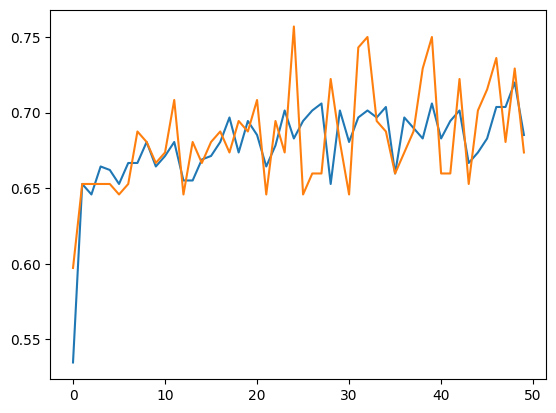

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')

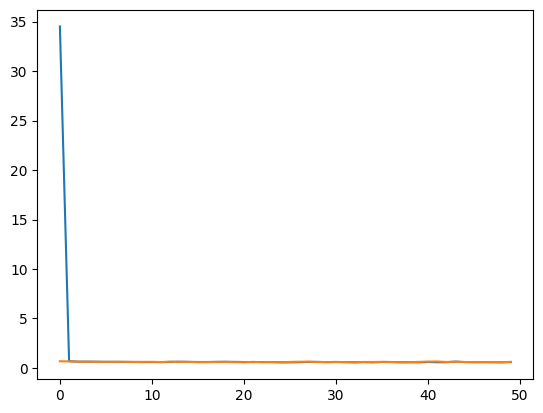

In [ ]:
plt.plot(hist.history['loss'], label = 'Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

6/6 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       123
           1       0.00      0.00      0.00        69

    accuracy                           0.64       192
   macro avg       0.32      0.50      0.39       192
weighted avg       0.41      0.64      0.50       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
